#### Named Entity Recognition

In [6]:
!pip install spacy

In [14]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-09-20 11:44:52.019494: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-09-20 11:44:52.019598: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [17]:
import pandas
book=pd.read_csv("apple.txt",error_bad_lines=False)

b'Skipping line 6: expected 1 fields, saw 14\n'


In [18]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [19]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm') 

one_block = book[20]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [20]:
for token in doc_block[0:20]:
    print(token, token.pos_)

After ADP
using VERB
Windows PROPN
Operating NOUN
system NOUN
for ADP
the DET
past ADJ
10 NUM
+ NUM
years NOUN
, PUNCT
I PRON
switched VERB
to ADP
Mac PROPN
. PUNCT
The DET
switch NOUN
was AUX


In [21]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['switch', 'inspired', 'reviews', 'got', 'friends', 'say', 'device', 'tech', 'is', 'Be', 'design', 'be', 'processing', 'speed', 'be', 'battery', 'life', 'device', 'get', 'marvel']


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
#Counting tokens again
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,be,3
1,device,2
2,tech,2
3,idea,2
4,using,1
5,operating,1
6,system,1
7,years,1
8,switched,1
9,switch,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

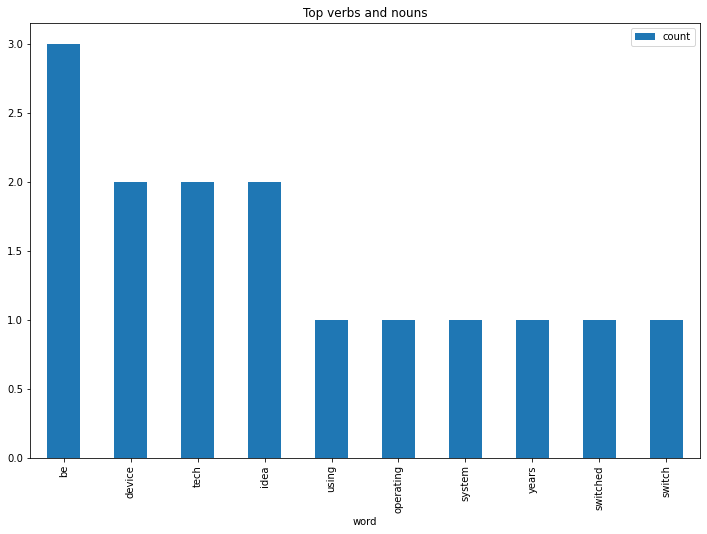

In [24]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [10]:
#Sentiment analysis
afinn = pd.read_csv('../input/afinn123/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [11]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [12]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [13]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20, affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("../input/apple123/apple.txt",error_bad_lines=False)
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

b'Skipping line 6: expected 1 fields, saw 14\n'


In [15]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]

['), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Overall V

In [16]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [17]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None) -> float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [18]:
# test that it works
calculate_sentiment(text = 'very sad')

-2

In [19]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [20]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    17
1     7
2    31
3     7
4    65
5     7
6    47
7    16
8    29
9    26
Name: word_count, dtype: int64

In [21]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
128,Display is too good and it feels like butter o...,5,12
179,great product The elegant work of apple can be...,5,13
64,I hope this comment can help to save somebody’...,6,10
46,Ships with macOS sierra but update is availabl...,6,86
103,The switch was inspired by the awesome reviews...,6,13
59,I use this for music production and it works a...,7,30
0,It's amazing..... battery last around 10 -12 h...,7,17
178,MERITS..IT IS BEST IN ITS PERFORMANCE..SOUND Q...,10,43
151,..So now I m working with the external keyboar...,17,113
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [22]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    187.000000
mean       0.978610
std        3.420302
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [23]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,"), all printers are not compatible (e.g.",0,7
7,you need to spend extra for an external CD wri...,0,16
10,"Marketing strategy for Indian market, if at al...",-3,15


In [24]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [25]:
sent_df['index']=range(0,len(sent_df))

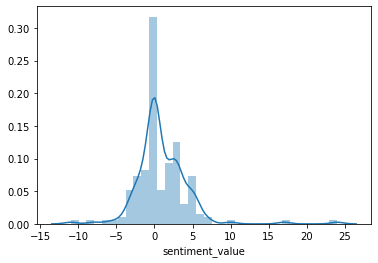

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

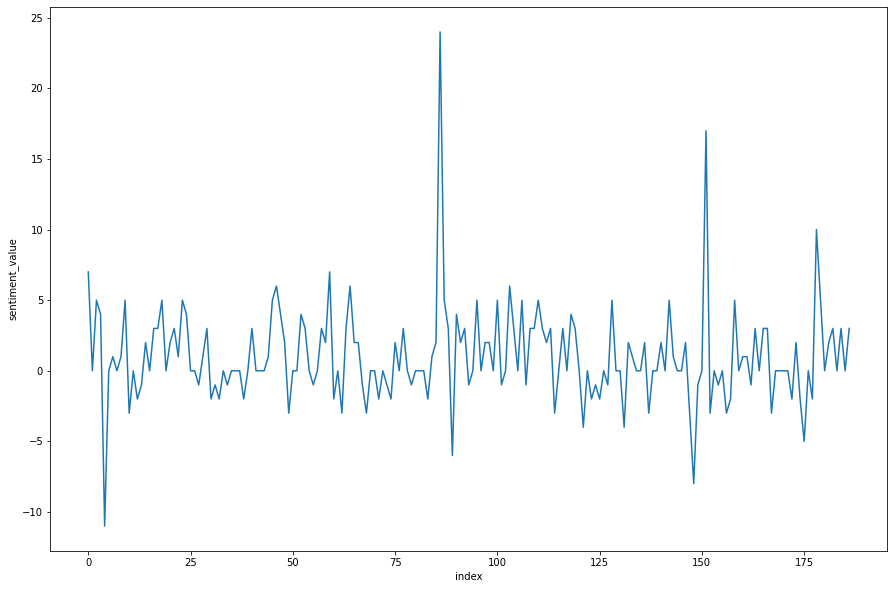

In [27]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

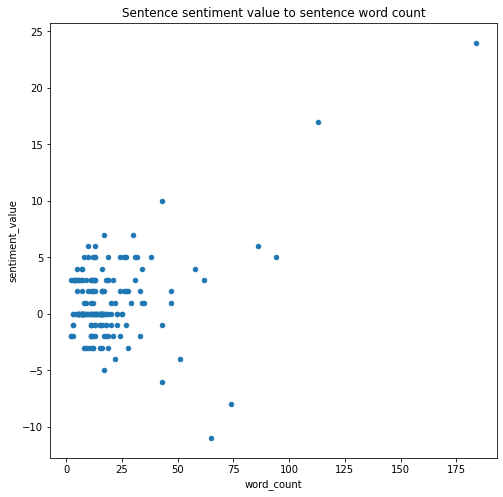

In [28]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')